# Este Análisis Exploratorio de Datos (EDA) es solo de los 
# datos pertenecientes al Internet Fijo en Argentina 🎇

In [143]:
# Importamos las librerías a usar
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ______________________________________________________________________________________

# Archivo 1
## Penetración por hogares a nivel nacional de Internet fijo
**Se refiere al porcentaje de hogares en un país que tienen acceso o utilizan servicios de Internet fijo**

In [136]:
internet_fijo = pd.read_csv('Sets/Fijo/inter_nac_fijo_clean.csv')
internet_fijo.head(3) # Miramos las primeras 3 líneas

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,76.64,23.95,Jul-Sept 2022
1,2022,2,75.97,23.72,Abr-Jun 2022
2,2022,1,73.88,23.05,Ene-Mar 2022


In [108]:
# Miramos los tipos de datos
internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           35 non-null     int64  
 1   Trimestre                     35 non-null     int64  
 2   Accesos por cada 100 hogares  35 non-null     float64
 3   Accesos por cada 100 hab      35 non-null     float64
 4   Periodo                       35 non-null     object 
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [109]:
# Convertimos las variables 'Año', 'Trimestre' y 'Periodo' a Category
internet_fijo['Año'] = internet_fijo['Año'].astype('category')
internet_fijo['Trimestre'] = internet_fijo['Trimestre'].astype('category')
internet_fijo['Periodo'] = internet_fijo['Periodo'].astype('category')

In [110]:
# Verificamos el cambio
internet_fijo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Año                           35 non-null     category
 1   Trimestre                     35 non-null     category
 2   Accesos por cada 100 hogares  35 non-null     float64 
 3   Accesos por cada 100 hab      35 non-null     float64 
 4   Periodo                       35 non-null     category
dtypes: category(3), float64(2)
memory usage: 2.7 KB


## ________________________________________________________________________________________________________
## Empezamos con los gráficos 👨‍💻
#### Para estos gráficos solo nos centraremos en las columnas:
#### 1. 'Año'
#### 2. 'Accesos por cada 100 hogares'
#### 3. 'Accesos por cada 100 habitantes'

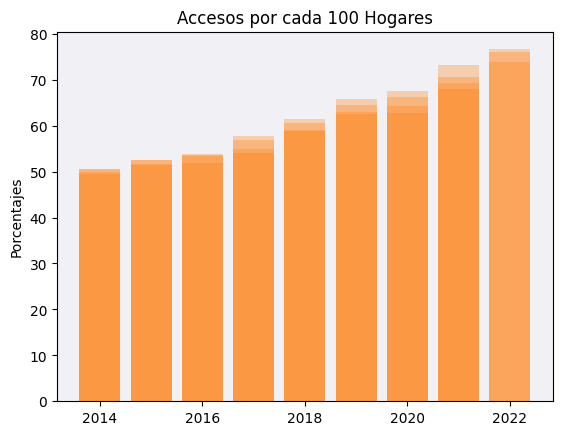

In [111]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(internet_fijo['Año'],internet_fijo['Accesos por cada 100 hogares'], alpha=0.3, color='#FF7F0E')
plt.ylabel('Porcentajes')
plt.title('Accesos por cada 100 Hogares')
plt.show()

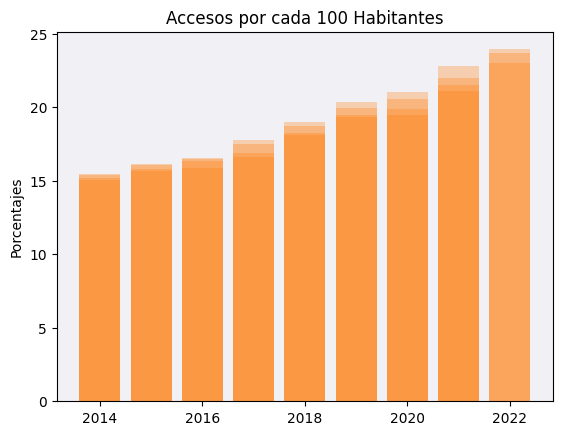

In [112]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(internet_fijo['Año'],internet_fijo['Accesos por cada 100 hab'], alpha=0.3, color='#FF7F0E')
plt.ylabel('Porcentajes')
plt.title('Accesos por cada 100 Habitantes')
plt.show()

In [ ]:
'''internet_fijo = internet_fijo.sort_values(by='Año')
internet_fijo['Crecimiento (%)'] = internet_fijo['Accesos por cada 100 hogares'].pct_change() * 100
print(internet_fijo[['Año', 'Accesos por cada 100 hogares', 'Crecimiento (%)']])
'''
# Este código los agrupa por trimestre

Se calcula el crecimiento anual

In [114]:
df_grouped = internet_fijo.groupby('Año').agg({'Accesos por cada 100 hogares': 'first'}).pct_change() * 100
df_grouped = df_grouped.round(2)
df_grouped = df_grouped.rename(columns={'Accesos por cada 100 hogares': 'Crecimiento anual %'})
df_grouped

,Crecimiento anual %
Año,
2014,NaN
2015,4.22
2016,2.49
2017,7.12
2018,6.30
2019,2.44
2020,7.47
2021,8.22
2022,4.73


Se calcula el promedio del crecimiento anual

In [115]:
print(df_grouped['Crecimiento anual %'].mean().round(2))

5.37


Se calcula la variabilidad del crecimiento anual

In [154]:
desviacion_estandar = df_grouped['Crecimiento anual %'].std().round(2)
desviacion_estandar

2.24

## Análisis 📑
#### 1. Los datos muestran una tendencia de crecimiento en el acceso a Internet por cada 100 hogares a lo largo del tiempo. 
#### 2. La tendencia indica que para el año 2,023 seguirá creciendo en promedio un 5.37%
#### 3. Variabilidad del crecimiento: La desviación estándar del crecimiento anual de los accesos a Internet en Argentina es de aproximadamente 2.24 %. Esto indica que hay una cierta variabilidad en el crecimiento año tras año

### **Estos datos muestran que Argentina, con el pasar de los años y el avance de la tecnología, cada vez los hogares van adoptando el Internet fijo.**

### **Estas observaciones proporcionan una visión general del panorama de los accesos a Internet en Argentina desde el año 2,014 hasta el 2,022.**

# _____________________________________________________________________________________
# Archivo 2
## Penetración de Internet fijo (accesos por cada 100 hogares)
**Se refiere al número de conexiones o accesos al servicio de Internet fijo que existen en una provincia en relación con cada 100 hogares en esa provincia**

**Este indicador proporciona una medida de la disponibilidad y adopción de Internet fijo a nivel provincial**

In [117]:
# Cargamos los datos
fijo_provincia = pd.read_csv('Sets/Fijo/inter_100_hogares_clean.csv')
fijo_provincia.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11
1,2022,3,Capital Federal,122.28
2,2022,3,Catamarca,65.33
3,2022,3,Chaco,43.86
4,2022,3,Chubut,84.38


In [118]:
# Miramos los tipos de datos
fijo_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           840 non-null    int64  
 1   Trimestre                     840 non-null    int64  
 2   Provincia                     840 non-null    object 
 3   Accesos por cada 100 hogares  840 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 26.4+ KB


In [119]:
# Convertimos las variables 'Año', 'Trimestre' y 'Periodo' a Category
fijo_provincia['Año'] = fijo_provincia['Año'].astype('category')
fijo_provincia['Trimestre'] = fijo_provincia['Trimestre'].astype('category')
fijo_provincia['Provincia'] = fijo_provincia['Provincia'].astype('category')

In [120]:
# Miramos los cambios
fijo_provincia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Año                           840 non-null    category
 1   Trimestre                     840 non-null    category
 2   Provincia                     840 non-null    category
 3   Accesos por cada 100 hogares  840 non-null    float64 
dtypes: category(3), float64(1)
memory usage: 10.4 KB


## ________________________________________________________________________________________________________
## Empezamos con los gráficos 👨‍💻
#### Para estos gráficos solo nos centraremos en las columnas:
#### 1. 'Año'
#### 2. 'Provincia'
#### 3. 'Accesos por cada 100 hogares'

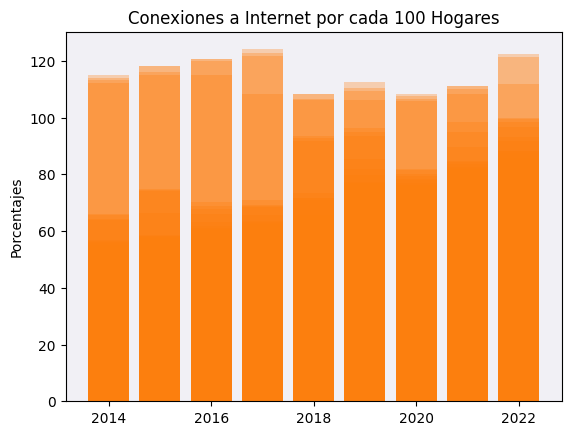

In [121]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(fijo_provincia['Año'],fijo_provincia['Accesos por cada 100 hogares'], alpha=0.3, color='#FF7F0E')
plt.ylabel('Porcentajes')
plt.title('Conexiones a Internet por cada 100 Hogares')
plt.show()

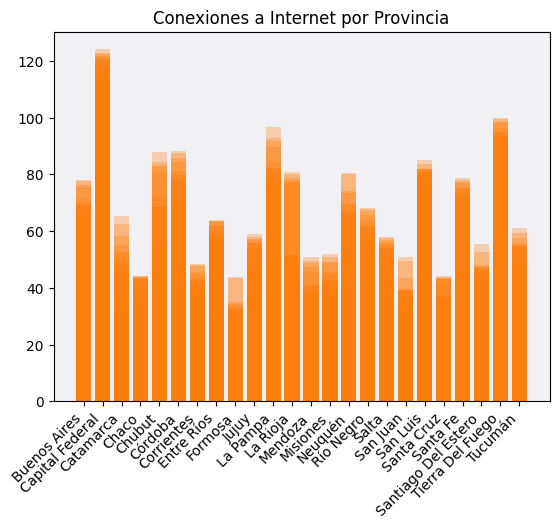

In [122]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(fijo_provincia['Provincia'],fijo_provincia['Accesos por cada 100 hogares'], alpha=0.3, color='#FF7F0E')
plt.xticks(rotation=45, ha='right')
plt.title('Conexiones a Internet por Provincia')
plt.show()

In [123]:
df_fijo = fijo_provincia.groupby('Año').agg({'Accesos por cada 100 hogares': 'first'}).pct_change() * 100
df_fijo = df_fijo.round(2)
df_fijo = df_fijo.rename(columns={'Accesos por cada 100 hogares': 'Crecimiento anual %'})
df_fijo

,Crecimiento anual %
Año,
2014,NaN
2015,3.92
2016,5.06
2017,-5.93
2018,12.13
2019,-0.54
2020,7.36
2021,9.68
2022,3.24


In [124]:
# Calculamos el promedio del Crecimiendo Anual
print(df_fijo['Crecimiento anual %'].mean().round(2))

4.36


In [125]:
# Miramos la Variabilidad
desviacion_estandar_fijo = df_fijo['Crecimiento anual %'].std().round(2)
desviacion_estandar_fijo

5.73

## Análisis 📑
#### 1. En general, el acceso a Internet por cada 100 hogares ha ido aumentando a lo largo de los años. 
#### Esto indica un crecimiento en la disponibilidad y acceso a servicios de Internet en las provincias.
#### 2. Todas las provincias muestran un aumento con respecto al año anterior, aunque algunas están sobre el promedio y otras por debajo, esto se puede deber a la infraestructura de cada provincia, inversión en telecomunicaciones, entre otros.
#### 3. En promedio las provincias crecen un 4.36 % año con año.
#### 4. Variabilidad del crecimiento: La desviación estándar del crecimiento anual de los accesos a Internet en Argentina es de aproximadamente 5.73 %. Esto indica que hay una cierta variabilidad en el crecimiento año tras año.

### **Estas observaciones proporcionan una visión general del panorama de los accesos a Internet en las provincias de Argentina desde el año 2,014 hasta el 2,022.**

# _______________________________________________________________________________________
# Archivo 3
## Ingresos por la prestación del servicio de Internet fijo

In [140]:
# Cargamos el archivo
ingresos = pd.read_csv('Sets/Fijo/Ingresos_Internet_Fijo.csv')
ingresos.head()

,Año,Trimestre,Ingreso en miles,Periodo
0,2022,3,"67,055,930",Jul-Sept 2022
1,2022,2,"60,335,724",Abr-Jun 2022
2,2022,1,"55,589,997",Ene-Mar 2022
3,2021,4,"45,467,887",Oct-Dic 2021
4,2021,3,"42,999,944",Jul-Sept 2021


In [141]:
# Pasamos las columnas Año y Trimestre a tipo de dato Categótico
ingresos['Año'] = ingresos['Año'].astype('category')
ingresos['Trimestre'] = ingresos['Trimestre'].astype('category')

In [147]:
# Reemplazamos en la columna 'Ingreso en miles' la ',' para que quede vacía
# y así poder convertirla en dato Float
ingresos['Ingreso en miles'] = ingresos['Ingreso en miles'].str.replace(',', '').astype(float)

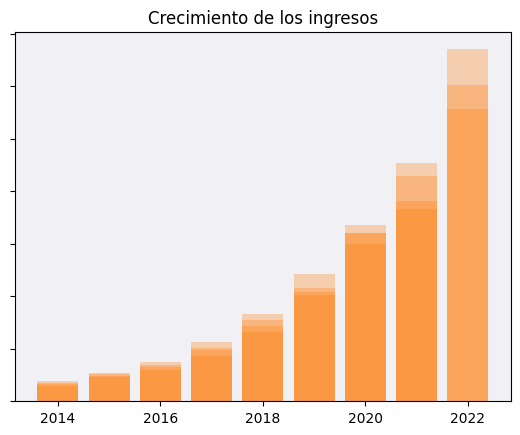

In [150]:
plt.rcParams['axes.facecolor'] = '#F1F0F5'
plt.bar(ingresos['Año'],ingresos['Ingreso en miles'], alpha=0.3, color='#FF7F0E')
plt.title('Crecimiento de los ingresos')
plt.tick_params(axis='y', labelleft=False)
plt.show()

In [149]:
inge = ingresos.groupby('Año').agg({'Ingreso en miles': 'first'}).pct_change() * 100
inge = inge.round(2)
inge = inge.rename(columns={'Ingreso en miles': 'Crecimiento anual %'})
inge

,Crecimiento anual %
Año,
2014,NaN
2015,36.11
2016,39.19
2017,50.00
2018,48.21
2019,45.27
2020,38.77
2021,35.56
2022,47.48


In [135]:
# Calculamos el promedio del Crecimiendo Anual
print(inge['Crecimiento anual %'].mean().round(2))

42.57


In [139]:
# Miramos la Variabilidad
desviacion_estandar_inge = inge['Crecimiento anual %'].std().round(2)
desviacion_estandar_inge

5.8

## _______________________________________________________________________________________________
## Análisis 📑
#### 1. En general, hay un crecimiento constante en los ingresos a lo largo del tiempo, con un aumento más pronunciado en los últimos años. 
#### 2. En los primeros años (2014-2016), los ingresos se mantienen en un rango bajo. 
#### El 2,015 con crecimiento del 36.11 % y el 2,016 con 39.19 %
#### 3. A partir de 2017, los ingresos experimentan un crecimiento más acelerado con un crecimiento del 50 %
#### 3. En el 2,022 se observa un aumento considerable en los ingresos con un 47.48 %
#### 4. La tendencia indica que el 2,023 tendrá un promedio de crecimiento en los ingresos del 42.57 %
#### 5. El crecimiento del 42.57 % puede tener una variabilidad del 5.8 % 

### **Los ingresos han casi duplicado su valor desde 2014.**
### **En general se observa una tendencia positiva de crecimiento a lo largo de los años.**